<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

** POINT ESTIMATION ** 

43.002372
43.08678


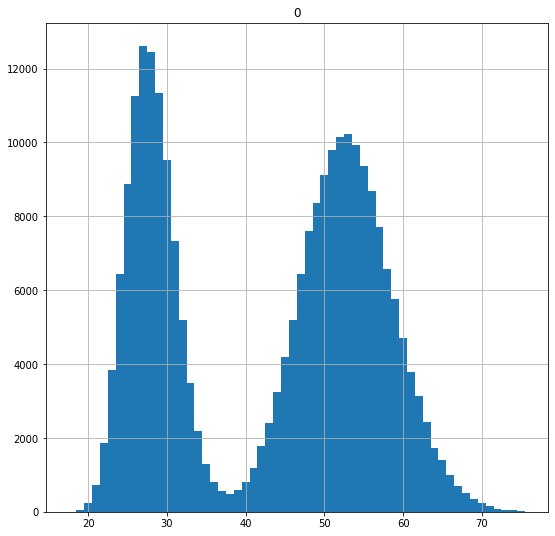

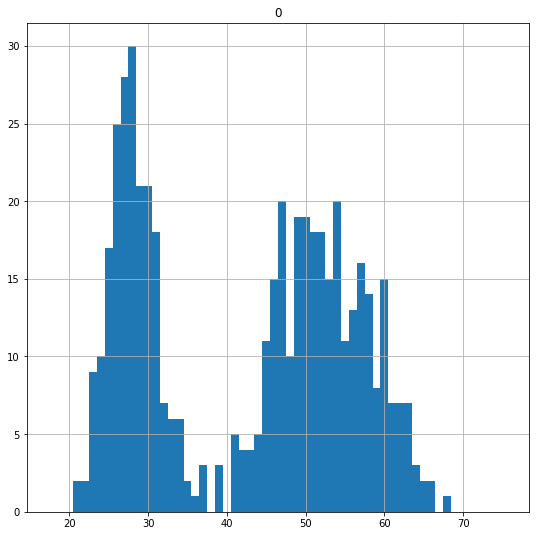

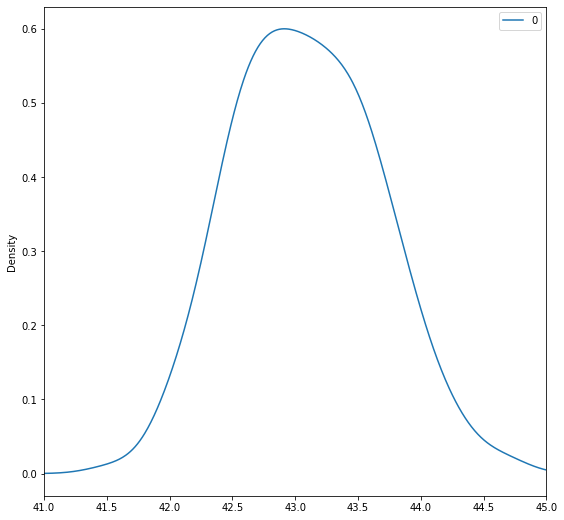

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

#Population
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))
population_ages.mean()
pd.DataFrame(population_ages).hist(bins=58,range=(17.5,75.5),figsize=(9,9))

#Sample
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,size=500)
pd.DataFrame(sample_ages).hist(bins=58, range=(17.5,75.5), figsize=(9,9))


# 200 Sample
np.random.seed(10)
point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",figsize=(9,9),xlim=(41,45)) 

print(population_ages.mean())
print(np.array(point_estimates).mean())


** INTERVAL ESTIMATION **

In [7]:
np.random.seed(10)
sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.6448536269514722
Confidence interval:
(41.834888075038016, 43.21111192496199)
